In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
class HawkesProcess:
    def __init__(self, mu, alpha, beta):
        self.mu = mu # Базовая интенсивность процесса
        self.alpha = alpha # степень влияния предыдущих событий
        self.beta = beta # Скорость затухания

    def simulate(self, T):
        t = np.random.exponential(scale=1.0/self.mu)
        events = [t]
        while t < T:
            lambd = self.mu + self.alpha * np.sum(np.exp(-(t - np.array(events)) * self.beta))
            dt = np.random.exponential(scale=1.0/lambd)
            t += dt
            if np.random.uniform() < (self.mu + self.alpha * np.sum(np.exp(-(t - np.array(events)) * self.beta))) / lambd:
                events.append(t)
        return events[:-1]

In [47]:
hp = HawkesProcess(mu=0.0033, alpha=0.0169, beta=0.0286)
events = hp.simulate(T=10_000)

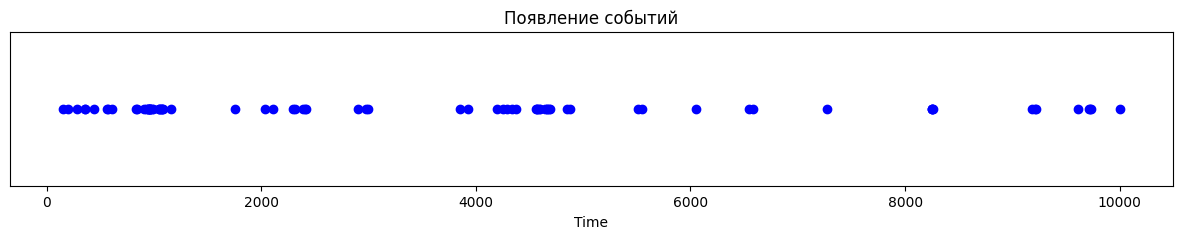

In [48]:
y = [1]*len(events)

plt.figure(figsize=(15,2))
plt.plot(events, y, 'bo')
plt.yticks([])
plt.xlabel('Time')
plt.title('Появление событий') 
plt.show()